In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

def science_plot(fontsize = 9):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [3]:
house_data = pd.read_csv("predict_home_value.csv")

print(f"Size: {len(house_data)}\n{house_data.dtypes}")
house_data.sample(5) #take 5 entries from the dataset

Size: 1460
ID               int64
LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
BSMTCOND        object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
ELECTRICAL      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
FIREPLACEQU     object
GARAGETYPE      object
GARAGEFINISH    object
GARAGECARS       int64
GARAGECOND      object
POOLAREA         int64
POOLQC          object
FENCE           object
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object


,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
848,849,45600,1Fam,1.5Fin,8,1908,Gable,TA,BrkTil,TA,...,Detchd,Unf,2,TA,0,NaN,NaN,9,2008,240000
515,516,12220,1Fam,1Story,5,2009,Hip,TA,CBlock,TA,...,Attchd,Fin,3,TA,0,NaN,NaN,9,2009,402861
1324,1325,9986,1Fam,1Story,5,2006,Gable,TA,PConc,TA,...,Attchd,RFn,3,TA,0,NaN,NaN,2,2007,147000
656,657,10007,1Fam,1Story,7,1959,Gable,TA,CBlock,TA,...,Attchd,RFn,1,TA,0,NaN,MnPrv,8,2008,145500
1192,1193,9600,1Fam,1.5Fin,8,1925,Gambrel,TA,PConc,TA,...,Detchd,Unf,1,Fa,0,NaN,GdWo,7,2007,125000


In [4]:
house_data.count()

ID              1460
LOTAREA         1460
BLDGTYPE        1460
HOUSESTYLE      1460
OVERALLCOND     1460
YEARBUILT       1460
ROOFSTYLE       1460
EXTERCOND       1460
FOUNDATION      1460
BSMTCOND        1423
HEATING         1460
HEATINGQC       1460
CENTRALAIR      1460
ELECTRICAL      1459
FULLBATH        1460
HALFBATH        1460
BEDROOMABVGR    1460
KITCHENABVGR    1460
KITCHENQUAL     1460
TOTRMSABVGRD    1460
FIREPLACES      1460
FIREPLACEQU      770
GARAGETYPE      1379
GARAGEFINISH    1379
GARAGECARS      1460
GARAGECOND      1379
POOLAREA        1460
POOLQC             7
FENCE            281
MOSOLD          1460
YRSOLD          1460
SALEPRICE       1460
dtype: int64

In [5]:
#Filter data based on condition
subset_cols = house_data.columns[~house_data.isna().any()] #All columns with no NA data
house_data_clean = house_data.loc[:, subset_cols]
house_data_clean

,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,HEATING,...,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FIREPLACES,GARAGECARS,POOLAREA,MOSOLD,YRSOLD,SALEPRICE
0,1,8450,1Fam,2Story,5,2003,Gable,TA,PConc,GasA,...,3,1,Gd,8,0,2,0,2,2008,208500
1,2,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,GasA,...,3,1,TA,6,1,2,0,5,2007,181500
2,3,11250,1Fam,2Story,5,2001,Gable,TA,PConc,GasA,...,3,1,Gd,6,1,2,0,9,2008,223500
3,4,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,GasA,...,3,1,Gd,7,1,3,0,2,2006,140000
4,5,14260,1Fam,2Story,5,2000,Gable,TA,PConc,GasA,...,4,1,Gd,9,1,3,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,1Fam,2Story,5,1999,Gable,TA,PConc,GasA,...,3,1,TA,7,1,2,0,8,2007,175000
1456,1457,13175,1Fam,1Story,6,1978,Gable,TA,CBlock,GasA,...,3,1,TA,7,2,2,0,2,2010,210000
1457,1458,9042,1Fam,2Story,9,1941,Gable,Gd,Stone,GasA,...,4,1,Gd,9,2,1,0,5,2010,266500
1458,1459,9717,1Fam,1Story,6,1950,Hip,TA,CBlock,GasA,...,2,1,Gd,5,0,1,0,4,2010,142125


Text(0.5, 0, 'Sale price')

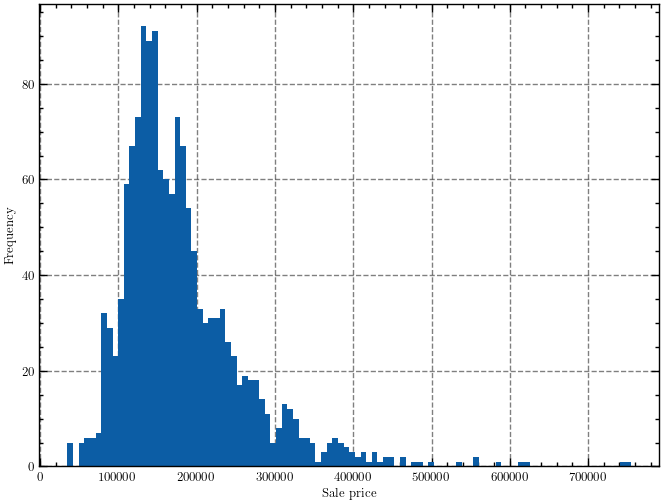

In [6]:
house_data_clean.loc[:,"SALEPRICE"].plot.hist(bins = 100)
plt.xlabel("Sale price")

Text(0, 0.5, 'Sale price')

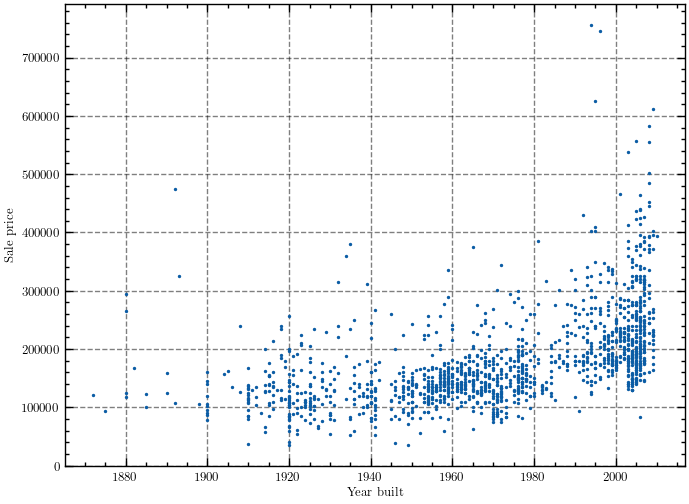

In [7]:
plt.scatter(house_data_clean["YEARBUILT"], house_data_clean["SALEPRICE"], s = 2)
plt.xlabel("Year built")
plt.ylabel("Sale price")

In [8]:
house_data_clean.dtypes

ID               int64
LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
GARAGECARS       int64
POOLAREA         int64
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object

In [9]:
regression = linear_model.LinearRegression()
regression.fit(house_data_clean["YEARBUILT"].values.reshape(-1,1), house_data_clean["SALEPRICE"].values.reshape(-1,1))

LinearRegression()

In [10]:
house_data_clean

,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,HEATING,...,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FIREPLACES,GARAGECARS,POOLAREA,MOSOLD,YRSOLD,SALEPRICE
0,1,8450,1Fam,2Story,5,2003,Gable,TA,PConc,GasA,...,3,1,Gd,8,0,2,0,2,2008,208500
1,2,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,GasA,...,3,1,TA,6,1,2,0,5,2007,181500
2,3,11250,1Fam,2Story,5,2001,Gable,TA,PConc,GasA,...,3,1,Gd,6,1,2,0,9,2008,223500
3,4,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,GasA,...,3,1,Gd,7,1,3,0,2,2006,140000
4,5,14260,1Fam,2Story,5,2000,Gable,TA,PConc,GasA,...,4,1,Gd,9,1,3,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,1Fam,2Story,5,1999,Gable,TA,PConc,GasA,...,3,1,TA,7,1,2,0,8,2007,175000
1456,1457,13175,1Fam,1Story,6,1978,Gable,TA,CBlock,GasA,...,3,1,TA,7,2,2,0,2,2010,210000
1457,1458,9042,1Fam,2Story,9,1941,Gable,Gd,Stone,GasA,...,4,1,Gd,9,2,1,0,5,2010,266500
1458,1459,9717,1Fam,1Story,6,1950,Hip,TA,CBlock,GasA,...,2,1,Gd,5,0,1,0,4,2010,142125


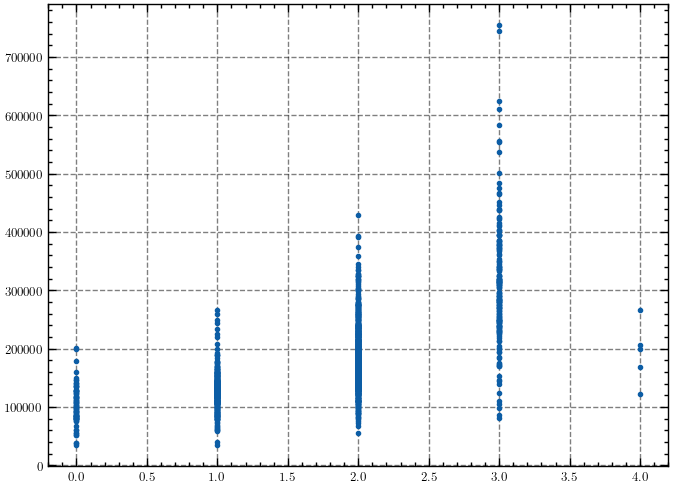

In [11]:
plt.scatter(house_data_clean["GARAGECARS"],house_data_clean["SALEPRICE"],marker ='.')
# report the loss
# R^2
# make a prediction data
# make a training data
# all 5 algorithms

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = house_data_clean.copy()


# Use only LOTAREA and SALEPRICE
feature_cols = ['LOTAREA', 'GARAGECARS', 'YEARBUILT', 'FIREPLACES', 'YRSOLD', 'TOTRMSABVGRD']
target_col = 'SALEPRICE'

for feature_col in feature_cols:
    X = df[[feature_col]]
    y = df[target_col]

    # Split the data: 80% train, 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the regressors
    regressors = {
        'HuberRegressor': make_pipeline(StandardScaler(), HuberRegressor()),
        'KernelRidge': make_pipeline(StandardScaler(), KernelRidge()),
        'MLPRegressor': make_pipeline(StandardScaler(), MLPRegressor(max_iter=1000, random_state=0)),
        'RandomForestRegressor': RandomForestRegressor(random_state=0),
        'AdaBoostRegressor': AdaBoostRegressor(random_state=0)
    }

    # Print column names
    bar = '='*65
    barmn = '-'*65
    print(bar)
    print(f" Feature: {feature_col}")
    print(f" Target:  {target_col}")
    print(barmn + '\n')
    # Train and evaluate each regressor
    for name, model in regressors.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        print(f"{name}         :")
        print(f"   RMSE (Train) : {rmse_train:.2f}")
        print(f"   RMSE (Test)  : {rmse_test:.2f}")
        print(f"   R^2  (Train) : {r2_train:.4f}")
        print(f"   R^2  (Test)  : {r2_test:.4f}\n")
print(bar)



 Feature: LOTAREA
 Target:  SALEPRICE
-----------------------------------------------------------------

HuberRegressor         :
   RMSE (Train) : 75806.87
   RMSE (Test)  : 84802.70
   R^2  (Train) : 0.0365
   R^2  (Test)  : 0.0624

KernelRidge         :
   RMSE (Train) : 196119.63
   RMSE (Test)  : 199412.13
   R^2  (Train) : -5.4486
   R^2  (Test)  : -4.1843



c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor         :
   RMSE (Train) : 193202.49
   RMSE (Test)  : 195389.15
   R^2  (Train) : -5.2582
   R^2  (Test)  : -3.9772

RandomForestRegressor         :
   RMSE (Train) : 34706.67
   RMSE (Test)  : 82394.25
   R^2  (Train) : 0.7980
   R^2  (Test)  : 0.1149

AdaBoostRegressor         :
   RMSE (Train) : 70181.26
   RMSE (Test)  : 80868.39
   R^2  (Train) : 0.1742
   R^2  (Test)  : 0.1474

 Feature: GARAGECARS
 Target:  SALEPRICE
-----------------------------------------------------------------

HuberRegressor         :
   RMSE (Train) : 60076.20
   RMSE (Test)  : 68793.35
   R^2  (Train) : 0.3949
   R^2  (Test)  : 0.3830

KernelRidge         :
   RMSE (Train) : 190879.37
   RMSE (Test)  : 195686.32
   R^2  (Train) : -5.1086
   R^2  (Test)  : -3.9924



c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor         :
   RMSE (Train) : 192623.75
   RMSE (Test)  : 194675.83
   R^2  (Train) : -5.2207
   R^2  (Test)  : -3.9409

RandomForestRegressor         :
   RMSE (Train) : 55575.58
   RMSE (Test)  : 60949.94
   R^2  (Train) : 0.4822
   R^2  (Test)  : 0.5157

AdaBoostRegressor         :
   RMSE (Train) : 56275.41
   RMSE (Test)  : 60600.95
   R^2  (Train) : 0.4690
   R^2  (Test)  : 0.5212

 Feature: YEARBUILT
 Target:  SALEPRICE
-----------------------------------------------------------------

HuberRegressor         :
   RMSE (Train) : 67432.35
   RMSE (Test)  : 74908.21
   R^2  (Train) : 0.2376
   R^2  (Test)  : 0.2684

KernelRidge         :
   RMSE (Train) : 193117.59
   RMSE (Test)  : 191606.70
   R^2  (Train) : -5.2527
   R^2  (Test)  : -3.7864



c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor         :
   RMSE (Train) : 192147.05
   RMSE (Test)  : 194048.86
   R^2  (Train) : -5.1900
   R^2  (Test)  : -3.9092

RandomForestRegressor         :
   RMSE (Train) : 56764.83
   RMSE (Test)  : 72178.05
   R^2  (Train) : 0.4598
   R^2  (Test)  : 0.3208

AdaBoostRegressor         :
   RMSE (Train) : 63858.42
   RMSE (Test)  : 73214.30
   R^2  (Train) : 0.3163
   R^2  (Test)  : 0.3012

 Feature: FIREPLACES
 Target:  SALEPRICE
-----------------------------------------------------------------

HuberRegressor         :
   RMSE (Train) : 69627.36
   RMSE (Test)  : 77494.79
   R^2  (Train) : 0.1872
   R^2  (Test)  : 0.2171

KernelRidge         :
   RMSE (Train) : 194002.31
   RMSE (Test)  : 195701.39
   R^2  (Train) : -5.3101
   R^2  (Test)  : -3.9931



c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor         :
   RMSE (Train) : 193050.92
   RMSE (Test)  : 195067.08
   R^2  (Train) : -5.2484
   R^2  (Test)  : -3.9608

RandomForestRegressor         :
   RMSE (Train) : 67852.78
   RMSE (Test)  : 76240.34
   R^2  (Train) : 0.2281
   R^2  (Test)  : 0.2422

AdaBoostRegressor         :
   RMSE (Train) : 70665.39
   RMSE (Test)  : 77291.17
   R^2  (Train) : 0.1628
   R^2  (Test)  : 0.2212

 Feature: YRSOLD
 Target:  SALEPRICE
-----------------------------------------------------------------

HuberRegressor         :
   RMSE (Train) : 78345.99
   RMSE (Test)  : 88205.74
   R^2  (Train) : -0.0291
   R^2  (Test)  : -0.0143

KernelRidge         :
   RMSE (Train) : 197193.03
   RMSE (Test)  : 199097.06
   R^2  (Train) : -5.5194
   R^2  (Test)  : -4.1679



c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor         :
   RMSE (Train) : 193081.73
   RMSE (Test)  : 195093.09
   R^2  (Train) : -5.2504
   R^2  (Test)  : -3.9622

RandomForestRegressor         :
   RMSE (Train) : 77164.69
   RMSE (Test)  : 87739.62
   R^2  (Train) : 0.0017
   R^2  (Test)  : -0.0036

AdaBoostRegressor         :
   RMSE (Train) : 78690.86
   RMSE (Test)  : 88904.78
   R^2  (Train) : -0.0382
   R^2  (Test)  : -0.0305

 Feature: TOTRMSABVGRD
 Target:  SALEPRICE
-----------------------------------------------------------------

HuberRegressor         :
   RMSE (Train) : 66321.34
   RMSE (Test)  : 72824.10
   R^2  (Train) : 0.2626
   R^2  (Test)  : 0.3086

KernelRidge         :
   RMSE (Train) : 193055.33
   RMSE (Test)  : 197805.01
   R^2  (Train) : -5.2486
   R^2  (Test)  : -4.1011



c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor         :
   RMSE (Train) : 192582.59
   RMSE (Test)  : 194658.96
   R^2  (Train) : -5.2181
   R^2  (Test)  : -3.9401

RandomForestRegressor         :
   RMSE (Train) : 65541.94
   RMSE (Test)  : 71109.13
   R^2  (Train) : 0.2798
   R^2  (Test)  : 0.3408

AdaBoostRegressor         :
   RMSE (Train) : 67003.79
   RMSE (Test)  : 70008.95
   R^2  (Train) : 0.2473
   R^2  (Test)  : 0.3610

